In [1]:
import os
import sys
import numpy as np
import pandas as pd
import ipyplot as iplt

images_dir = "/data/myntra/"

In [2]:
df = pd.read_json("s3://aisle3-ml-datasets/myntra/main.json.gz", lines=True, compression="gzip")
df

,id,title,brand,gender,color,images,variants,description,specifications,breadcrumbs
0,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,[10001097/418f58ef-2616-42bb-b25a-97def03459a6...,[],"[A pair of black, blue, and beige open toe hee...","{'Heel Type': 'Block', 'Type': 'Sandals', 'Hee...","[Home, Footwear, Women Footwear, Heels, Beli H..."
1,10001377,Women Peach-Coloured Self-Striped Sneakers,Shoe Couture,women,peach,[10001377/863d9e1d-34a5-4599-b7d4-74a18fa0b60e...,[],[A pair of round-toe self-striped peach-colour...,"{'Type': 'Sneakers', 'Toe Shape': 'Round Toe',...","[Home, Footwear, Women Footwear, Casual Shoes,..."
2,10001657,Boys Pink Printed Comfort Sandals,Bubblegummers,kids,pink,[10001657/471691ef-d30f-4cbb-945d-e150e79a8402...,[],"[A pair of pink printed comfort sandals, Synth...",None,"[Home, Footwear, Boys Footwear, Sandals, Bubbl..."
3,10005997,Men Navy Blue Solid Leather Mid-Top Sneakers,ID,men,navy blue,[10005997/480d064c-ed23-4555-af4f-77f746e8a4ac...,[],"[A pair of round-toe navy blue sneakers, has m...","{'Type': 'Sneakers', 'Toe Shape': 'Round Toe',...","[Home, Footwear, Men Footwear, Casual Shoes, I..."
4,10005999,Men Tan Brown Solid Comfort Leather Sandals,ID,men,tan,[10005999/4e310e43-ac10-4198-a5d4-23c235b653ce...,[],"[A pair of tan solid Comfort Sandals, Leather ...",None,"[Home, Footwear, Men Footwear, Flip Flops, ID ..."
...,...,...,...,...,...,...,...,...,...,...
83056,9982703,Women Black Solid Velvet Mules,Sherrif Shoes,women,black,[9982703/7d9fb17b-0948-4cee-9c10-829eedca6a2d1...,[],"[A pair of black pointed toe flats, has regula...",None,"[Home, Footwear, Women Footwear, Flats, Sherri..."
83057,9982707,Women Black Solid Synthetic Patent Ballerinas,Sherrif Shoes,women,black,[9982707/d377897e-fbd5-4471-ab2b-3ac52b4210301...,[],"[detail, Synthetic patent upper, Cushioned foo...",None,"[Home, Footwear, Women Footwear, Flats, Sherri..."
83058,9989377,Women Black Solid Leather Ballerinas,Clarks,women,black,[9989377/959ae3f4-120b-4ab2-80ee-6d5b39dd87b51...,[],"[A pair of black round-toe flats, has regular ...",None,"[Home, Footwear, Women Footwear, Flats, Clarks..."
83059,9989381,Women Black Leather Sneakers,Clarks,women,black,[9989381/1d789424-523d-4aa1-a2c6-cdda079a845b1...,[],"[A pair of round-toe black sneakers, has regul...","{'Type': 'Sneakers', 'Toe Shape': 'Round Toe',...","[Home, Footwear, Women Footwear, Casual Shoes,..."


In [3]:
df.drop(columns=["variants", "description", "specifications", "breadcrumbs"], inplace=True)
df

,id,title,brand,gender,color,images
0,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,[10001097/418f58ef-2616-42bb-b25a-97def03459a6...
1,10001377,Women Peach-Coloured Self-Striped Sneakers,Shoe Couture,women,peach,[10001377/863d9e1d-34a5-4599-b7d4-74a18fa0b60e...
2,10001657,Boys Pink Printed Comfort Sandals,Bubblegummers,kids,pink,[10001657/471691ef-d30f-4cbb-945d-e150e79a8402...
3,10005997,Men Navy Blue Solid Leather Mid-Top Sneakers,ID,men,navy blue,[10005997/480d064c-ed23-4555-af4f-77f746e8a4ac...
4,10005999,Men Tan Brown Solid Comfort Leather Sandals,ID,men,tan,[10005999/4e310e43-ac10-4198-a5d4-23c235b653ce...
...,...,...,...,...,...,...
83056,9982703,Women Black Solid Velvet Mules,Sherrif Shoes,women,black,[9982703/7d9fb17b-0948-4cee-9c10-829eedca6a2d1...
83057,9982707,Women Black Solid Synthetic Patent Ballerinas,Sherrif Shoes,women,black,[9982707/d377897e-fbd5-4471-ab2b-3ac52b4210301...
83058,9989377,Women Black Solid Leather Ballerinas,Clarks,women,black,[9989377/959ae3f4-120b-4ab2-80ee-6d5b39dd87b51...
83059,9989381,Women Black Leather Sneakers,Clarks,women,black,[9989381/1d789424-523d-4aa1-a2c6-cdda079a845b1...


In [4]:
df = df.rename(columns={"images": "image"})
df = df.explode("image").dropna(subset=["image"]).reset_index(drop=True)
df

,id,title,brand,gender,color,image
0,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/418f58ef-2616-42bb-b25a-97def03459a61...
1,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/2bf8655a-3972-42ad-b3ab-ba411b7313621...
2,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/79a0e2e0-22b9-4ba0-bfd9-948f47eed6371...
3,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/5d195e49-f731-4a30-ac76-c7eff8a441cc1...
4,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/64875bbf-5b55-4d26-adfa-726bc94d38fa1...
...,...,...,...,...,...,...
445757,9996177,Women Rose Gold Printed Heels,Bruno Manetti,women,None,9996177/939c8c4b-3fbf-46e3-a70c-61222d7d48d415...
445758,9996177,Women Rose Gold Printed Heels,Bruno Manetti,women,None,9996177/253a02fb-10c7-488e-a557-bf2f425b13b615...
445759,9996177,Women Rose Gold Printed Heels,Bruno Manetti,women,None,9996177/bb3d1ef6-9e92-448a-a088-69993f01b8f715...
445760,9996177,Women Rose Gold Printed Heels,Bruno Manetti,women,None,9996177/de400b53-faf2-4f2f-8316-bffef043b6ad15...


In [5]:
(images_dir + df.image).apply(os.path.isfile).value_counts()

True    445762
Name: image, dtype: int64

<AxesSubplot:>

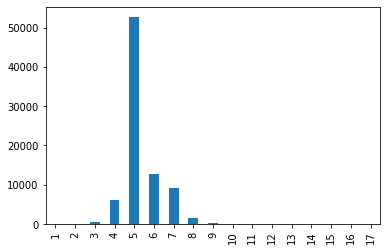

In [6]:
img_dist = df.id.value_counts()
img_dist.value_counts().sort_index().plot.bar()

### Retain minimum 4 images per product

In [7]:
df = df.loc[df.id.isin(set(img_dist[img_dist > 4].index))].reset_index(drop=True)
df

,id,title,brand,gender,color,image
0,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/418f58ef-2616-42bb-b25a-97def03459a61...
1,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/2bf8655a-3972-42ad-b3ab-ba411b7313621...
2,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/79a0e2e0-22b9-4ba0-bfd9-948f47eed6371...
3,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/5d195e49-f731-4a30-ac76-c7eff8a441cc1...
4,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/64875bbf-5b55-4d26-adfa-726bc94d38fa1...
...,...,...,...,...,...,...
420394,9996177,Women Rose Gold Printed Heels,Bruno Manetti,women,None,9996177/939c8c4b-3fbf-46e3-a70c-61222d7d48d415...
420395,9996177,Women Rose Gold Printed Heels,Bruno Manetti,women,None,9996177/253a02fb-10c7-488e-a557-bf2f425b13b615...
420396,9996177,Women Rose Gold Printed Heels,Bruno Manetti,women,None,9996177/bb3d1ef6-9e92-448a-a088-69993f01b8f715...
420397,9996177,Women Rose Gold Printed Heels,Bruno Manetti,women,None,9996177/de400b53-faf2-4f2f-8316-bffef043b6ad15...


In [8]:
df.gender.value_counts(normalize=True) * 100

women    50.408778
men      42.215609
kids      7.375612
Name: gender, dtype: float64

In [9]:
df.brand.value_counts(normalize=True).head(30) * 100

Puma                     4.097298
Roadster                 2.870368
Metro                    2.547580
DressBerry               2.073982
Mochi                    2.001670
Shoetopia                1.978121
Inc 5                    1.894629
Mast & Harbour           1.873696
Campus                   1.872983
Bata                     1.617749
Anouk                    1.537349
FAUSTO                   1.484542
Carlton London           1.480498
House of Pataudi         1.292819
WALKWAY                  1.288062
ADIDAS                   1.137491
U.S. Polo Assn.          1.128690
Kook N Keech             1.121078
Birkenstock              1.107044
Khadims                  1.093961
Liberty                  0.970269
HRX by Hrithik Roshan    0.923884
Red Tape                 0.895102
Tommy Hilfiger           0.856091
Skechers                 0.837776
YK                       0.815178
Rocia                    0.767128
Crocs                    0.730972
Nike                     0.727166
San Frissco   

In [10]:
df["label"] = df.id
df

,id,title,brand,gender,color,image,label
0,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/418f58ef-2616-42bb-b25a-97def03459a61...,10001097
1,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/2bf8655a-3972-42ad-b3ab-ba411b7313621...,10001097
2,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/79a0e2e0-22b9-4ba0-bfd9-948f47eed6371...,10001097
3,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/5d195e49-f731-4a30-ac76-c7eff8a441cc1...,10001097
4,10001097,Women Black & Blue Woven Design Heels,Beli,women,black,10001097/64875bbf-5b55-4d26-adfa-726bc94d38fa1...,10001097
...,...,...,...,...,...,...,...
420394,9996177,Women Rose Gold Printed Heels,Bruno Manetti,women,None,9996177/939c8c4b-3fbf-46e3-a70c-61222d7d48d415...,9996177
420395,9996177,Women Rose Gold Printed Heels,Bruno Manetti,women,None,9996177/253a02fb-10c7-488e-a557-bf2f425b13b615...,9996177
420396,9996177,Women Rose Gold Printed Heels,Bruno Manetti,women,None,9996177/bb3d1ef6-9e92-448a-a088-69993f01b8f715...,9996177
420397,9996177,Women Rose Gold Printed Heels,Bruno Manetti,women,None,9996177/de400b53-faf2-4f2f-8316-bffef043b6ad15...,9996177


In [11]:
df.image = "myntra/images/" + df.image
df.image

0         myntra/images/10001097/418f58ef-2616-42bb-b25a...
1         myntra/images/10001097/2bf8655a-3972-42ad-b3ab...
2         myntra/images/10001097/79a0e2e0-22b9-4ba0-bfd9...
3         myntra/images/10001097/5d195e49-f731-4a30-ac76...
4         myntra/images/10001097/64875bbf-5b55-4d26-adfa...
                                ...                        
420394    myntra/images/9996177/939c8c4b-3fbf-46e3-a70c-...
420395    myntra/images/9996177/253a02fb-10c7-488e-a557-...
420396    myntra/images/9996177/bb3d1ef6-9e92-448a-a088-...
420397    myntra/images/9996177/de400b53-faf2-4f2f-8316-...
420398    myntra/images/9996177/dabfe0b4-913f-4ca3-b503-...
Name: image, Length: 420399, dtype: object

In [12]:
df.to_csv("s3://aisle3-ml-datasets/arcface/image/train/myntra.csv", index=False)